###Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.
To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough)


##Importing all Require libraries for the case study:

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from scipy.stats import kurtosis
import scipy


# Importing Data Sets

In [ ]:
# 1. 'application_data.csv'  contains all the information of the client at the time of application.
#The data is about whether a client has payment difficulties.

df=pd.read_csv("application_data (1).csv")

In [ ]:
#2. 'previous_application.csv' contains information about the client’s previous loan data.
# It contains the data whether the previous application had been Approved, Canceled, Refused or Unused offer.

pa_df=pd.read_csv("previous_application.csv")

In [ ]:
#3. 'columns_description.csv' is a data dictionary which describes the meaning of the variables.

col_df=pd.read_csv("columns_description.csv", encoding='latin1')


###Viewing Data

In [ ]:
#checking first 5 rows of columns description data set
col_df.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [ ]:
#Checking names of rows of all the data sets
col_df['Row']

0                     SK_ID_CURR
1                         TARGET
2             NAME_CONTRACT_TYPE
3                    CODE_GENDER
4                   FLAG_OWN_CAR
                 ...            
155               DAYS_FIRST_DUE
156    DAYS_LAST_DUE_1ST_VERSION
157                DAYS_LAST_DUE
158             DAYS_TERMINATION
159    NFLAG_INSURED_ON_APPROVAL
Name: Row, Length: 160, dtype: object

In [ ]:
#chaking shape of columns description data set
col_df.shape

(160, 5)

In [ ]:
#Displaying the column names, Non-Null Count in each column, and data type of respective column of dataframe using the function df.info
col_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   160 non-null    int64 
 1   Table        160 non-null    object
 2   Row          160 non-null    object
 3   Description  160 non-null    object
 4   Special      69 non-null     object
dtypes: int64(1), object(4)
memory usage: 6.4+ KB


In [ ]:
#Cheking first 5 rows of application_data
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Cheking first 5 rows of previous_application data
pa_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11.0,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11.0,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7.0,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9.0,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#chcking shape of Application data
df.shape

(112568, 122)

In [ ]:
#checking Dimention of Application data
df.ndim

2

In [ ]:
#Checking last 5 rows of Application data
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
112563,230573,1,Cash loans,F,N,Y,0,157500.0,387000.0,26307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112564,230574,0,Cash loans,F,Y,Y,1,202500.0,1470330.0,56002.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
112565,230575,0,Revolving loans,F,N,Y,1,90000.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
112566,230576,0,Revolving loans,F,N,Y,1,54000.0,180000.0,9000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112567,230577,0,Cash loans,M,N,Y,0,135000.0,728460.0,38938.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#checking Data types for Application Data
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
#Checking the column names, Non-Null Count in each column, and data type of respective column of dataframe using the function df.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112568 entries, 0 to 112567
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(85), int64(21), object(16)
memory usage: 104.8+ MB


In [ ]:
#Gives statestical Description of continues data
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,112568.000000,112568.000000,112568.000000,1.125680e+05,1.125680e+05,112561.000000,1.124800e+05,112568.000000,112568.000000,112568.000000,...,112567.000000,112567.000000,112567.000000,112567.000000,97426.000000,97426.000000,97426.000000,97426.000000,97426.000000,97426.000000
mean,165299.106735,0.081506,0.417916,1.693523e+05,5.988978e+05,27093.243721,5.382569e+05,0.020857,-16031.682174,63559.335913,...,0.008271,0.000640,0.000515,0.000311,0.006672,0.007236,0.033656,0.267085,0.266140,1.892185
std,37695.825512,0.273612,0.721349,3.633325e+05,4.022424e+05,14529.828326,3.696342e+05,0.013828,4368.315130,141062.951776,...,0.090567,0.025283,0.022693,0.017630,0.086423,0.109394,0.203198,0.917826,0.613627,1.872578
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000533,-25201.000000,-17531.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,132708.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16488.000000,2.385000e+05,0.010006,-19676.000000,-2759.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,165224.500000,0.000000,0.000000,1.440000e+05,5.124465e+05,24885.000000,4.500000e+05,0.018850,-15744.500000,-1217.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,197943.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12393.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,230577.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7676.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,9.000000,8.000000,24.000000,8.000000,25.000000


In [ ]:
#Gives statestical Description of all columns including catorgerical data
df.describe(include='all')


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,112568.000000,112568.000000,112568,112568,112568,112568,112568.000000,1.125680e+05,1.125680e+05,112561.000000,...,112567.000000,112567.000000,112567.000000,112567.000000,97426.000000,97426.000000,97426.000000,97426.000000,97426.000000,97426.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,101897,74089,74368,78095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,165299.106735,0.081506,NaN,NaN,NaN,NaN,0.417916,1.693523e+05,5.988978e+05,27093.243721,...,0.008271,0.000640,0.000515,0.000311,0.006672,0.007236,0.033656,0.267085,0.266140,1.892185
std,37695.825512,0.273612,NaN,NaN,NaN,NaN,0.721349,3.633325e+05,4.022424e+05,14529.828326,...,0.090567,0.025283,0.022693,0.017630,0.086423,0.109394,0.203198,0.917826,0.613627,1.872578
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1980.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,132708.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16488.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,165224.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.440000e+05,5.124465e+05,24885.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,197943.250000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


#2:: Data Wrangling

###As data is having huge number of lines, we will analyze data in parts

In [ ]:
#defining new Data frame using limited number of columns
new_df=df[['SK_ID_CURR','TARGET','DAYS_EMPLOYED','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_EMAIL','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','ORGANIZATION_TYPE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','DAYS_LAST_PHONE_CHANGE']]

In [ ]:
#checking first 5 rows of new data frame
new_df.head()

,SK_ID_CURR,TARGET,DAYS_EMPLOYED,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,DAYS_LAST_PHONE_CHANGE
0,100002,1,-637,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,...,2,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,-1134.0
1,100003,0,-1188,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,...,1,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,-828.0
2,100004,0,-225,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,...,2,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,-815.0
3,100006,0,-3039,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,...,2,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,-617.0
4,100007,0,-3038,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,...,2,0,0,Religion,NaN,0.322738,NaN,NaN,NaN,-1106.0


In [ ]:
#cheking shape of new data, we have now reduced our no of columns from 122 to 30
new_df.shape

(112568, 30)

In [ ]:
#checking names of columns of new data
new_df.columns

Index(['SK_ID_CURR', 'TARGET', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

####Renaming the column names

In [ ]:
list=['Cust_ID','TARGET','DAYS_EMPLOYED','INCOME', 'Loan_AMT', 'ANNUITY',
       'GOODS_PRICE', 'INCOME_TYPE', 'EDUCATION',
       'FAMILY_STATUS', 'curr_HOUSING_TYPE', 'age',
       'Work_Exp', 'REGISTRATION_change', 'DAYS_ID_PUBLISH', 'MOBIL_given',
       'EMAIL_given', 'OCCUPATION_TYPE', 'Family_MEMBERS_no',
       'REGION_CLIENT', 'REGION_CLIENT_CITY',
       'Perman_add_NOT_cont_REGION', 'perman_add_NOT_WORK_add',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'LAST_PHONE_CHANGE']

In [ ]:
new_df.columns=list

In [ ]:
new_df.columns

Index(['Cust_ID', 'TARGET', 'DAYS_EMPLOYED', 'INCOME', 'Loan_AMT', 'ANNUITY',
       'GOODS_PRICE', 'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS',
       'curr_HOUSING_TYPE', 'age', 'Work_Exp', 'REGISTRATION_change',
       'DAYS_ID_PUBLISH', 'MOBIL_given', 'EMAIL_given', 'OCCUPATION_TYPE',
       'Family_MEMBERS_no', 'REGION_CLIENT', 'REGION_CLIENT_CITY',
       'Perman_add_NOT_cont_REGION', 'perman_add_NOT_WORK_add',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'LAST_PHONE_CHANGE'],
      dtype='object')

In [ ]:
#checking duplicate rows in a data set
new_df.duplicated().sum()

0

##Checking for null values in columns

In [ ]:
def null_values(new_df):
    return round((new_df.isnull().sum()*100/len(new_df)).sort_values(ascending = False),2)

In [ ]:
#displaying columns with Percentage of null values
null_values(new_df)

BASEMENTAREA_AVG              58.50
EXT_SOURCE_1                  56.37
APARTMENTS_AVG                50.78
OCCUPATION_TYPE               31.30
EXT_SOURCE_3                  19.85
EXT_SOURCE_2                   0.21
GOODS_PRICE                    0.08
ANNUITY                        0.01
LAST_PHONE_CHANGE              0.00
Family_MEMBERS_no              0.00
EMAIL_given                    0.00
ORGANIZATION_TYPE              0.00
perman_add_NOT_WORK_add        0.00
Perman_add_NOT_cont_REGION     0.00
REGION_CLIENT_CITY             0.00
REGION_CLIENT                  0.00
Cust_ID                        0.00
TARGET                         0.00
DAYS_ID_PUBLISH                0.00
REGISTRATION_change            0.00
Work_Exp                       0.00
age                            0.00
curr_HOUSING_TYPE              0.00
FAMILY_STATUS                  0.00
EDUCATION                      0.00
INCOME_TYPE                    0.00
Loan_AMT                       0.00
INCOME                      

BASEMENTAREA_AVG              58.52
EXT_SOURCE_1                  56.38

APARTMENTS_AVG                50.75

OCCUPATION_TYPE               31.35

EXT_SOURCE_3                  19.83

these are the columns having maximum null values

In [ ]:
#number of null values per column
print("missing values : ",new_df.isna().sum().sort_values(ascending = False))

missing values :  BASEMENTAREA_AVG              65850
EXT_SOURCE_1                  63458
APARTMENTS_AVG                57161
OCCUPATION_TYPE               35239
EXT_SOURCE_3                  22341
EXT_SOURCE_2                    242
GOODS_PRICE                      88
ANNUITY                           7
LAST_PHONE_CHANGE                 2
Family_MEMBERS_no                 1
EMAIL_given                       0
ORGANIZATION_TYPE                 0
perman_add_NOT_WORK_add           0
Perman_add_NOT_cont_REGION        0
REGION_CLIENT_CITY                0
REGION_CLIENT                     0
Cust_ID                           0
TARGET                            0
DAYS_ID_PUBLISH                   0
REGISTRATION_change               0
Work_Exp                          0
age                               0
curr_HOUSING_TYPE                 0
FAMILY_STATUS                     0
EDUCATION                         0
INCOME_TYPE                       0
Loan_AMT                          0
INCOME    

##Replacing null values 
###TO deal with missing data?

Drop data:

        a. Drop the whole row

        b. Drop the whole column
 
Replace data

        a. Replace it by mean
        
        b. Replace it by frequency
        
        c. Replace it based on other functions

In [ ]:
#Replacing null values with NAN 
new_df=new_df.replace(np.nan, 'NAN')

###Understanding the Categorical variables

In [ ]:
#taking info to check Column name,  Non-Null Count, Dtype and sape of data (307511X28 )
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112568 entries, 0 to 112567
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Cust_ID                     112568 non-null  int64  
 1   TARGET                      112568 non-null  int64  
 2   DAYS_EMPLOYED               112568 non-null  int64  
 3   INCOME                      112568 non-null  float64
 4   Loan_AMT                    112568 non-null  float64
 5   ANNUITY                     112568 non-null  object 
 6   GOODS_PRICE                 112568 non-null  object 
 7   INCOME_TYPE                 112568 non-null  object 
 8   EDUCATION                   112568 non-null  object 
 9   FAMILY_STATUS               112568 non-null  object 
 10  curr_HOUSING_TYPE           112568 non-null  object 
 11  age                         112568 non-null  int64  
 12  Work_Exp                    112568 non-null  int64  
 13  REGISTRATION_c

##Checking statisticsal summary of all the columns


In [ ]:
#statistical summary of all the numeric columns
new_df.describe()

,Cust_ID,TARGET,DAYS_EMPLOYED,INCOME,Loan_AMT,age,Work_Exp,REGISTRATION_change,DAYS_ID_PUBLISH,MOBIL_given,EMAIL_given,REGION_CLIENT,REGION_CLIENT_CITY,Perman_add_NOT_cont_REGION,perman_add_NOT_WORK_add
count,112568.000000,112568.000000,112568.000000,1.125680e+05,1.125680e+05,112568.000000,112568.000000,112568.000000,112568.000000,112568.000000,112568.000000,112568.000000,112568.000000,112568.000000,112568.000000
mean,165299.106735,0.081506,63559.335913,1.693523e+05,5.988978e+05,-16031.682174,63559.335913,-4982.872513,-2992.331595,0.999991,0.056286,2.053443,2.032283,0.015093,0.050556
std,37695.825512,0.273612,141062.951776,3.633325e+05,4.022424e+05,4368.315130,141062.951776,3524.591117,1510.128878,0.002981,0.230474,0.509824,0.503355,0.121924,0.219090
min,100002.000000,0.000000,-17531.000000,2.565000e+04,4.500000e+04,-25201.000000,-17531.000000,-22392.000000,-6337.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,132708.750000,0.000000,-2759.000000,1.125000e+05,2.700000e+05,-19676.000000,-2759.000000,-7472.000000,-4297.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,165224.500000,0.000000,-1217.000000,1.440000e+05,5.124465e+05,-15744.500000,-1217.000000,-4490.000000,-3253.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000
75%,197943.250000,0.000000,-289.000000,2.025000e+05,8.086500e+05,-12393.000000,-289.000000,-2009.750000,-1714.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000
max,230577.000000,1.000000,365243.000000,1.170000e+08,4.050000e+06,-7676.000000,365243.000000,0.000000,0.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000


In [ ]:
#checking correlation between columns of numeric data
new_df.corr()

,Cust_ID,TARGET,DAYS_EMPLOYED,INCOME,Loan_AMT,age,Work_Exp,REGISTRATION_change,DAYS_ID_PUBLISH,MOBIL_given,EMAIL_given,REGION_CLIENT,REGION_CLIENT_CITY,Perman_add_NOT_cont_REGION,perman_add_NOT_WORK_add
Cust_ID,1.000000,0.005502,0.002465,-0.003224,-0.001235,-0.001166,0.002465,-0.000877,0.000985,0.003714,0.004453,0.002683,0.001681,-0.002489,0.002253
TARGET,0.005502,1.000000,-0.043798,0.003209,-0.030425,0.077260,-0.043798,0.039388,0.052699,0.000888,-0.002314,0.059714,0.061265,0.005465,0.005505
DAYS_EMPLOYED,0.002465,-0.043798,1.000000,-0.043064,-0.067486,-0.615530,1.000000,-0.207209,-0.271894,0.001349,-0.062400,0.031955,0.033434,-0.037708,-0.106636
INCOME,-0.003224,0.003209,-0.043064,1.000000,0.103743,0.019943,-0.043064,0.016871,0.005238,0.000356,0.024628,-0.056008,-0.060258,0.020677,0.041675
Loan_AMT,-0.001235,-0.030425,-0.067486,0.103743,1.000000,-0.056979,-0.067486,0.005419,-0.011956,0.002373,0.014611,-0.101258,-0.110164,0.022468,0.049147
age,-0.001166,0.077260,-0.615530,0.019943,-0.056979,1.000000,-0.615530,0.329423,0.271771,-0.005088,0.090630,0.014218,0.012919,0.064245,0.095442
Work_Exp,0.002465,-0.043798,1.000000,-0.043064,-0.067486,-0.615530,1.000000,-0.207209,-0.271894,0.001349,-0.062400,0.031955,0.033434,-0.037708,-0.106636
REGISTRATION_change,-0.000877,0.039388,-0.207209,0.016871,0.005419,0.329423,-0.207209,1.000000,0.101602,-0.000163,0.034424,0.082778,0.076605,0.029154,0.038791
DAYS_ID_PUBLISH,0.000985,0.052699,-0.271894,0.005238,-0.011956,0.271771,-0.271894,0.101602,1.000000,-0.003784,0.026946,-0.003427,-0.006485,0.032925,0.047929
MOBIL_given,0.003714,0.000888,0.001349,0.000356,0.002373,-0.005088,0.001349,-0.000163,-0.003784,1.000000,0.000728,0.000312,0.000191,0.000369,0.000688


In [ ]:
#statistical summary of all the non numeric columns
new_df.describe(include='all')

,Cust_ID,TARGET,DAYS_EMPLOYED,INCOME,Loan_AMT,ANNUITY,GOODS_PRICE,INCOME_TYPE,EDUCATION,FAMILY_STATUS,...,REGION_CLIENT_CITY,Perman_add_NOT_cont_REGION,perman_add_NOT_WORK_add,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,LAST_PHONE_CHANGE
count,112568.000000,112568.000000,112568.000000,1.125680e+05,1.125680e+05,112568.0,112568.0,112568,112568,112568,...,112568.000000,112568.000000,112568.000000,112568,112568,112568.000000,112568,112568,112568,112568.0
unique,NaN,NaN,NaN,NaN,NaN,11111.0,644.0,8,5,6,...,NaN,NaN,NaN,58,46349,71125.000000,773,1929,3272,3587.0
top,NaN,NaN,NaN,NaN,NaN,9000.0,450000.0,Working,Secondary / secondary special,Married,...,NaN,NaN,NaN,Business Entity Type 3,NAN,0.285898,NAN,NAN,NAN,0.0
freq,NaN,NaN,NaN,NaN,NaN,2361.0,9486.0,58324,80026,72048,...,NaN,NaN,NaN,25008,63458,259.000000,22341,57161,65850,13861.0
mean,165299.106735,0.081506,63559.335913,1.693523e+05,5.988978e+05,NaN,NaN,NaN,NaN,NaN,...,2.032283,0.015093,0.050556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,37695.825512,0.273612,141062.951776,3.633325e+05,4.022424e+05,NaN,NaN,NaN,NaN,NaN,...,0.503355,0.121924,0.219090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,100002.000000,0.000000,-17531.000000,2.565000e+04,4.500000e+04,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,132708.750000,0.000000,-2759.000000,1.125000e+05,2.700000e+05,NaN,NaN,NaN,NaN,NaN,...,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,165224.500000,0.000000,-1217.000000,1.440000e+05,5.124465e+05,NaN,NaN,NaN,NaN,NaN,...,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,197943.250000,0.000000,-289.000000,2.025000e+05,8.086500e+05,NaN,NaN,NaN,NaN,NaN,...,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Checking unique values for catogorical columns and Visualizing data

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

###Target variable 
(1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

In [ ]:
#unique value INCOME_TYPE
new_df.TARGET.unique()

array([1, 0])

In [ ]:
#count of unique value INCOME_TYPE   
v=new_df.TARGET.value_counts()
v

0    103393
1      9175
Name: TARGET, dtype: int64

<BarContainer object of 2 artists>

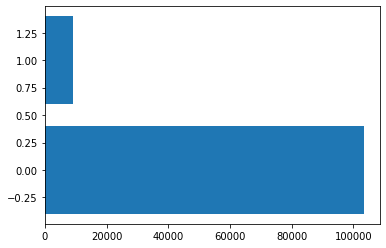

In [ ]:
plt.barh(v.index, v)

### Calculating Imbalance percentage using Target Variable

([<matplotlib.patches.Wedge at 0x7f2c8d5baca0>,
 [Text(-1.0641350120652933, 0.27859769578515553, '0'),
  Text(1.0641349925021417, -0.2785977705087878, '1')],
 [Text(-0.5804372793083418, 0.1519623795191757, '91.85%'),
  Text(0.5804372686375318, -0.1519624202775206, '8.15%')])

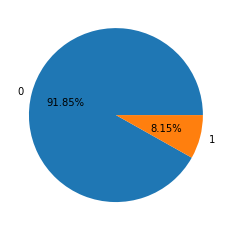

In [ ]:
plt.pie(x=v, labels=v.index, autopct='%1.2f%%')

#It shows that 8.15% people do not repay there loan

###INCOME_TYPE

In [ ]:
#unique value INCOME_TYPE
new_df.INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [ ]:
#count of unique value INCOME_TYPE   
a=new_df.INCOME_TYPE.value_counts()
a

Working                 58324
Commercial associate    26149
Pensioner               20186
State servant            7883
Unemployed                 10
Student                    10
Businessman                 4
Maternity leave             2
Name: INCOME_TYPE, dtype: int64

<BarContainer object of 8 artists>

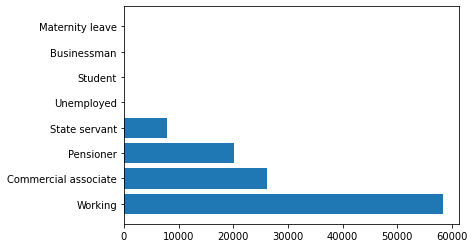

In [ ]:
plt.barh(a.index, a)

#here we see that most number of people who take Loan fall under Income_type (occupation)==>Working (158774), Commercial associate (71617),
#Pensioner (55362), State servant (21703)


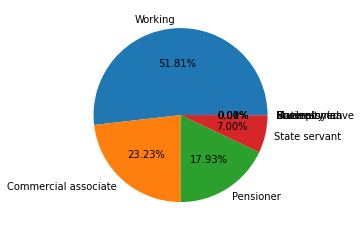

<Figure size 1440x1440 with 0 Axes>

In [ ]:
#Showcasing  Income_type typr of people along with there Percentage w.r.t total number of people taking loan
plt.pie(x=a, labels=a.index, autopct='%1.2f%%')


plt.figure(figsize = [20,20])
plt.show()

###EDUCATION

In [ ]:
new_df.EDUCATION.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
b=new_df.EDUCATION.value_counts()
b
#maximum people who take loan are having Education asSecondary / secondary special with count of 218391

Secondary / secondary special    80026
Higher education                 27417
Incomplete higher                 3702
Lower secondary                   1364
Academic degree                     59
Name: EDUCATION, dtype: int64

<BarContainer object of 5 artists>

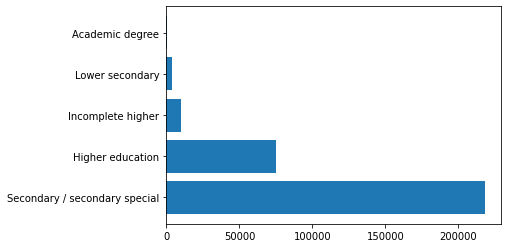

In [ ]:
plt.barh(b.index, b)

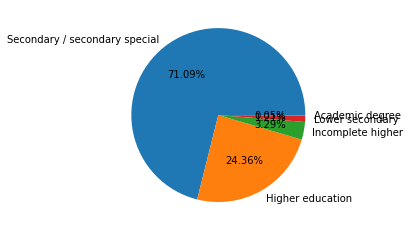

In [ ]:
plt.pie(x=b, labels=b.index, autopct='%1.2f%%')

plt.show()

###FAMILY_STATUS

In [ ]:
new_df.FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [ ]:
c=new_df.FAMILY_STATUS.value_counts()
c

Married                 72048
Single / not married    16413
Civil marriage          11049
Separated                7156
Widow                    5901
Unknown                     1
Name: FAMILY_STATUS, dtype: int64

<BarContainer object of 6 artists>

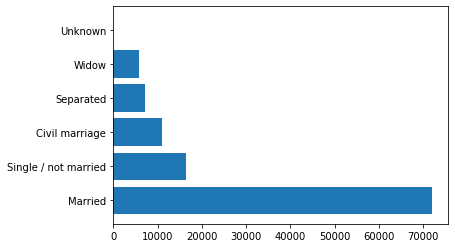

In [ ]:
plt.barh(c.index, c)

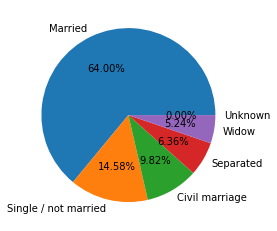

In [ ]:
plt.pie(x=c, labels=c.index, autopct='%1.2f%%')

plt.show()

###curr_HOUSING_TYPE

In [ ]:
new_df.curr_HOUSING_TYPE.unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [ ]:
d=new_df.curr_HOUSING_TYPE.value_counts()
d

House / apartment      99999
With parents            5400
Municipal apartment     4110
Rented apartment        1693
Office apartment         961
Co-op apartment          405
Name: curr_HOUSING_TYPE, dtype: int64

<BarContainer object of 6 artists>

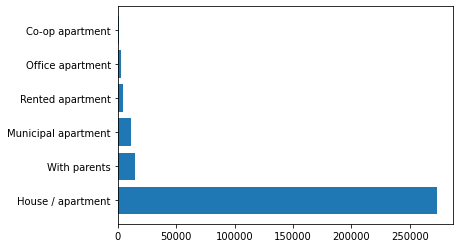

In [ ]:
plt.barh(d.index, d)

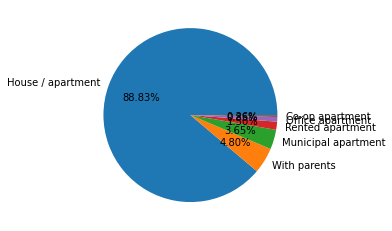

In [ ]:
plt.pie(x=d, labels=d.index, autopct='%1.2f%%')

plt.show()

###ORGANIZATION_TYPE

In [ ]:
new_df.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [ ]:
plt.pyplot.hist(new_df["ORGANIZATION_TYPE"])

In [ ]:
new_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

##for catogorical data

In [ ]:
#Checking the data Types
new_df.dtypes

Cust_ID                         int64
INCOME                        float64
Loan_AMT                      float64
ANNUITY                        object
GOODS_PRICE                    object
INCOME_TYPE                    object
EDUCATION                      object
FAMILY_STATUS                  object
curr_HOUSING_TYPE              object
age                             int64
Work_Exp                        int64
REGISTRATION_change           float64
DAYS_ID_PUBLISH                 int64
MOBIL_given                     int64
EMAIL_given                     int64
OCCUPATION_TYPE                object
Family_MEMBERS_no              object
REGION_CLIENT                   int64
REGION_CLIENT_CITY              int64
Perman_add_NOT_cont_REGION      int64
perman_add_NOT_WORK_add         int64
ORGANIZATION_TYPE              object
EXT_SOURCE_1                   object
EXT_SOURCE_2                   object
EXT_SOURCE_3                   object
APARTMENTS_AVG                 object
BASEMENTAREA

In [ ]:
#taking only continues data into account and making new data frame
cat_df=new_df[['Cust_ID','INCOME','Loan_AMT','ANNUITY','GOODS_PRICE']]

In [ ]:
cat_df.head()

,Cust_ID,INCOME,Loan_AMT,ANNUITY,GOODS_PRICE
0,100002,202500.0,406597.5,24700.5,351000.0
1,100003,270000.0,1293502.5,35698.5,1129500.0
2,100004,67500.0,135000.0,6750.0,135000.0
3,100006,135000.0,312682.5,29686.5,297000.0
4,100007,121500.0,513000.0,21865.5,513000.0


In [ ]:
#Checking Corrilation Between columns of numric continues data
cat_df.corr()

,Cust_ID,INCOME,Loan_AMT
Cust_ID,1.000000,-0.00182,-0.000343
INCOME,-0.001820,1.00000,0.156870
Loan_AMT,-0.000343,0.15687,1.000000


##Ploting pairplot  for continues data to check the retaion between columns

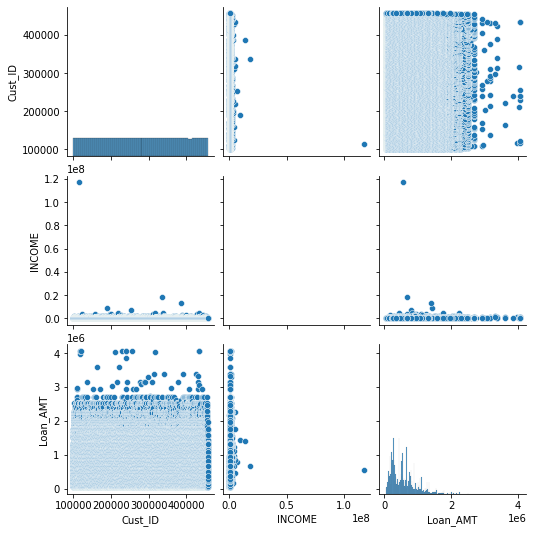

In [ ]:
sns.pairplot(data=cat_df)

#Handling Outliers

####INCOME

In [ ]:
#Checking outliers for INCOME
cat_df.INCOME.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: INCOME, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


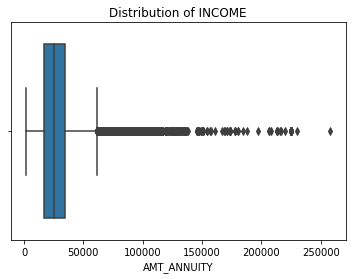

In [ ]:
sns.boxplot(cat_df.INCOME)
plt.title('Distribution of INCOME')
plt.show()

#Loan_AMT

In [ ]:
#Checking outliers for Loan Amount
cat_df.Loan_AMT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: Loan_AMT, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


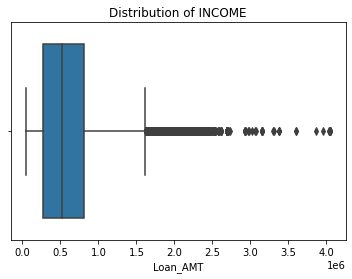

In [ ]:
sns.boxplot(cat_df.Loan_AMT)
plt.title('Distribution of INCOME')
plt.show()

In [ ]:
#Filterring data on bases of Laon amount for top 10 loan amounts
df_amt=cat_df.nlargest(10,columns='Loan_AMT')
df_amt.head()

,Cust_ID,INCOME,Loan_AMT,ANNUITY,GOODS_PRICE
14852,117337,760846.5,4050000.0,146002.5,4050000.0
17948,120926,783000.0,4050000.0,258025.5,4050000.0
110459,228135,864900.0,4050000.0,102384.0,4050000.0
119681,238782,931365.0,4050000.0,102514.5,4050000.0
120757,240007,587250.0,4050000.0,106969.5,4050000.0


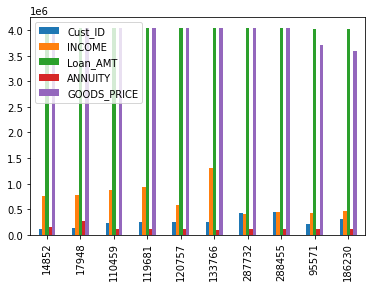

In [ ]:
#Plotting graph for approved loan amount 
df_amt.plot.bar()

#ANNUITY

In [ ]:
#Checking outliers for ANNUITY
cat_df.ANNUITY.describe()

count     307511.0
unique     13673.0
top         9000.0
freq        6385.0
Name: ANNUITY, dtype: float64

In [ ]:
cat_df.shape

(307511, 5)

In [ ]:
print("missing values from Annuty : ",cat_df.ANNUITY.isna().sum())

missing values from Annuty :  0


#GOODS_PRICE

In [ ]:
#Checking outliers for GOODS_PRICE
cat_df.GOODS_PRICE.describe()

count     307511.0
unique      1003.0
top       450000.0
freq       26022.0
Name: GOODS_PRICE, dtype: float64

#Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable).


In [ ]:
new_df.TARGET.unique()

array([1, 0])

In [ ]:
r=new_df.TARGET.value_counts()
r

0    282686
1     24825
Name: TARGET, dtype: int64

<BarContainer object of 2 artists>

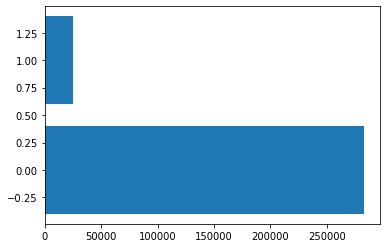

In [ ]:
plt.barh(r.index, r)

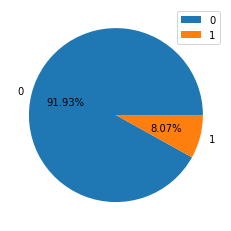

In [ ]:
plt.pie(x=r, labels=r.index, autopct='%1.2f%%')
plt.legend()
plt.show()

##Conclustion:: 8.07% of people have payment difficulty

In [ ]:
cat_df.head()

,Cust_ID,INCOME,Loan_AMT,ANNUITY,GOODS_PRICE
0,100002,202500.0,406597.5,24700.5,351000.0
1,100003,270000.0,1293502.5,35698.5,1129500.0
2,100004,67500.0,135000.0,6750.0,135000.0
3,100006,135000.0,312682.5,29686.5,297000.0
4,100007,121500.0,513000.0,21865.5,513000.0


# Binary Logistic Regression(taking into account Target as response variable)


In [ ]:
dff=new_df[['Cust_ID','TARGET','INCOME','Loan_AMT','ANNUITY','GOODS_PRICE']]

General Regression::
at least 1 catagorical predictor(we create dummy var) and respoce is continues(we have target variable as catogorical data)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
mydf=dff[['TARGET','INCOME','Loan_AMT','ANNUITY','GOODS_PRICE']]

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(mydf.drop('TARGET', axis=1), mydf.TARGET, test_size=0.2)


#checking for Target var vs Income

In [ ]:
x = mydf[['INCOME']]
y=mydf[['TARGET']]

In [ ]:
x=sm.add_constant(x)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
x

,const,INCOME
0,1.0,202500.0
1,1.0,270000.0
2,1.0,67500.0
3,1.0,135000.0
4,1.0,121500.0
...,...,...
307506,1.0,157500.0
307507,1.0,72000.0
307508,1.0,153000.0
307509,1.0,171000.0


In [ ]:
mod = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.280512
         Iterations 7


In [ ]:
print(mod.summary())   

                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               307511
Model:                          Logit   Df Residuals:                   307509
Method:                           MLE   Df Model:                            1
Date:                Sat, 31 Dec 2022   Pseudo R-squ.:               0.0001219
Time:                        11:29:51   Log-Likelihood:                -86260.
converged:                       True   LL-Null:                       -86271.
Covariance Type:            nonrobust   LLR p-value:                 4.514e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3800      0.013   -176.495      0.000      -2.406      -2.354
INCOME     -3.142e-07   7.08e-08     -4.435      0.000   -4.53e-07   -1.75e-07


#p=value is <0.05 so Ho is rejected and it means that Income affect the person will default or not on loan repayment

#checking for Target var vs Loan_AMT

In [ ]:
x = mydf[['Loan_AMT']]
y=mydf[['TARGET']]


In [ ]:
x=sm.add_constant(x)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
x

,const,Loan_AMT
0,1.0,406597.5
1,1.0,1293502.5
2,1.0,135000.0
3,1.0,312682.5
4,1.0,513000.0
...,...,...
307506,1.0,254700.0
307507,1.0,269550.0
307508,1.0,677664.0
307509,1.0,370107.0


In [ ]:
mod1 = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.280066
         Iterations 7


In [ ]:
print(mod1.summary()) 

                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               307511
Model:                          Logit   Df Residuals:                   307509
Method:                           MLE   Df Model:                            1
Date:                Sat, 31 Dec 2022   Pseudo R-squ.:                0.001712
Time:                        12:23:30   Log-Likelihood:                -86123.
converged:                       True   LL-Null:                       -86271.
Covariance Type:            nonrobust   LLR p-value:                 3.428e-66
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2617      0.012   -190.937      0.000      -2.285      -2.239
Loan_AMT   -2.946e-07   1.75e-08    -16.825      0.000   -3.29e-07    -2.6e-07


#p=value is <0.05 so Ho is rejected and it means that Loan_AMT  affect the person will default or not on loan repayment